In [190]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [191]:
df = pd.read_csv('archive/Training Data.csv')
df = df.drop(['Id'], axis=1)

df.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [192]:
X = df
y = X.pop('Risk_Flag')

X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14


In [193]:
X.nunique()[['Married/Single', 'House_Ownership', 'Car_Ownership']]

Married/Single     2
House_Ownership    3
Car_Ownership      2
dtype: int64

In [194]:
X['Married/Single'] = X['Married/Single'] == 'single'
X['Married/Single'] = X['Married/Single'] * 1

X.head()

,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS
0,1303834,23,3,1,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13
1,7574516,40,10,1,rented,no,Software_Developer,Parbhani,Maharashtra,9,13
2,3991815,66,4,0,rented,no,Technical_writer,Alappuzha,Kerala,4,10
3,6256451,41,2,1,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12
4,5768871,47,11,1,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14


In [195]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

le = LabelEncoder()
one = OneHotEncoder(sparse=False)

le.fit_transform(X['House_Ownership'])

array([2, 2, 2, ..., 2, 2, 2])

In [196]:
values = one.fit_transform(X['House_Ownership'].values.reshape(-1, 1))

cols = list(one.categories_[0])
X[cols] = values
X.drop('House_Ownership', axis = 1, inplace=True)

X.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,norent_noown,owned,rented
0,1303834,23,3,1,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0.0,0.0,1.0
1,7574516,40,10,1,no,Software_Developer,Parbhani,Maharashtra,9,13,0.0,0.0,1.0
2,3991815,66,4,0,no,Technical_writer,Alappuzha,Kerala,4,10,0.0,0.0,1.0
3,6256451,41,2,1,yes,Software_Developer,Bhubaneswar,Odisha,2,12,0.0,0.0,1.0
4,5768871,47,11,1,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,0.0,0.0,1.0


In [197]:
X['Car_Ownership'] = X['Car_Ownership'] == 'yes'
X['Car_Ownership'] = X['Car_Ownership'] * 1

X.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,norent_noown,owned,rented
0,1303834,23,3,1,0,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0.0,0.0,1.0
1,7574516,40,10,1,0,Software_Developer,Parbhani,Maharashtra,9,13,0.0,0.0,1.0
2,3991815,66,4,0,0,Technical_writer,Alappuzha,Kerala,4,10,0.0,0.0,1.0
3,6256451,41,2,1,1,Software_Developer,Bhubaneswar,Odisha,2,12,0.0,0.0,1.0
4,5768871,47,11,1,0,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,0.0,0.0,1.0


In [198]:
!pip install category_encoders
from category_encoders import LeaveOneOutEncoder

In [199]:
enc = LeaveOneOutEncoder()   

X['Profession'] = enc.fit_transform(X['Profession'], y)
X['CITY'] = enc.fit_transform(X['CITY'], y)
X['STATE'] = enc.fit_transform(X['STATE'], y)


X.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,norent_noown,owned,rented
0,1303834,23,3,1,0,0.111580,0.121706,0.154380,3,13,0.0,0.0,1.0
1,7574516,40,10,1,0,0.148456,0.122642,0.113258,9,13,0.0,0.0,1.0
2,3991815,66,4,0,0,0.134193,0.131004,0.167126,4,10,0.0,0.0,1.0
3,6256451,41,2,1,1,0.148258,0.325083,0.142366,2,12,0.0,0.0,1.0
4,5768871,47,11,1,0,0.115594,0.120050,0.103108,3,14,0.0,0.0,1.0


In [200]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler().fit(X)
X_num = std.transform(X)
norm_col = pd.DataFrame(X_num, index=X.index, columns=X.columns) 

X.update(norm_col)

X.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,norent_noown,owned,rented
0,-1.283145,-1.579604,-1.180232,0.337200,-0.657129,-0.704721,-0.027357,1.771037,-0.914131,0.716356,-0.171302,-0.232447,0.294423
1,0.895457,-0.583344,-0.014067,0.337200,-0.657129,1.570844,-0.007581,-0.549796,0.731036,0.716356,-0.171302,-0.232447,0.294423
2,-0.349269,0.940348,-1.013637,-2.965599,-0.657129,0.690717,0.169275,2.490407,-0.639936,-1.427981,-0.171302,-0.232447,0.294423
3,0.437526,-0.524740,-1.346827,0.337200,1.521772,1.558629,4.273611,1.093004,-1.188325,0.001577,-0.171302,-0.232447,0.294423
4,0.268128,-0.173119,0.152528,0.337200,-0.657129,-0.457020,-0.062397,-1.122651,-0.914131,1.431135,-0.171302,-0.232447,0.294423


In [201]:
X['Risk_Flag'] = y
X.head()

,Income,Age,Experience,Married/Single,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,norent_noown,owned,rented,Risk_Flag
0,-1.283145,-1.579604,-1.180232,0.337200,-0.657129,-0.704721,-0.027357,1.771037,-0.914131,0.716356,-0.171302,-0.232447,0.294423,0
1,0.895457,-0.583344,-0.014067,0.337200,-0.657129,1.570844,-0.007581,-0.549796,0.731036,0.716356,-0.171302,-0.232447,0.294423,0
2,-0.349269,0.940348,-1.013637,-2.965599,-0.657129,0.690717,0.169275,2.490407,-0.639936,-1.427981,-0.171302,-0.232447,0.294423,0
3,0.437526,-0.524740,-1.346827,0.337200,1.521772,1.558629,4.273611,1.093004,-1.188325,0.001577,-0.171302,-0.232447,0.294423,1
4,0.268128,-0.173119,0.152528,0.337200,-0.657129,-0.457020,-0.062397,-1.122651,-0.914131,1.431135,-0.171302,-0.232447,0.294423,1


Text(0.5, 1.0, 'Correlation Heatmap')

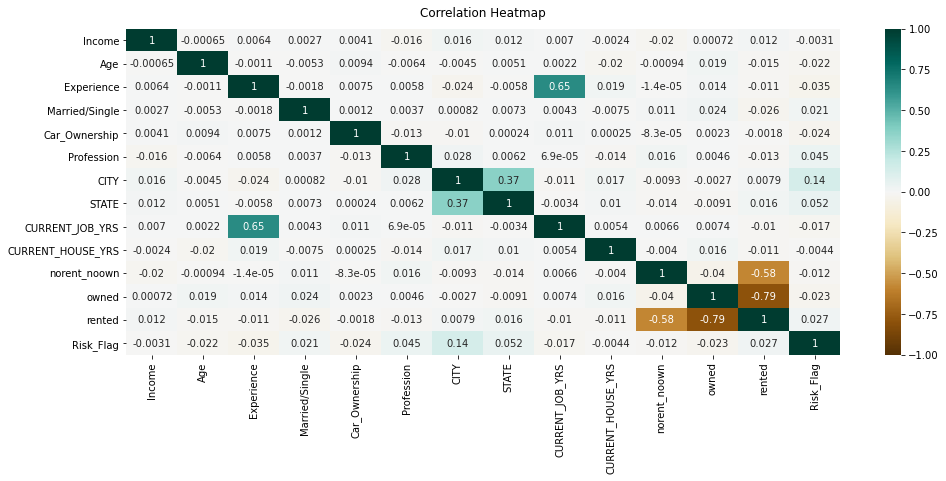

In [202]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap = 'BrBG')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

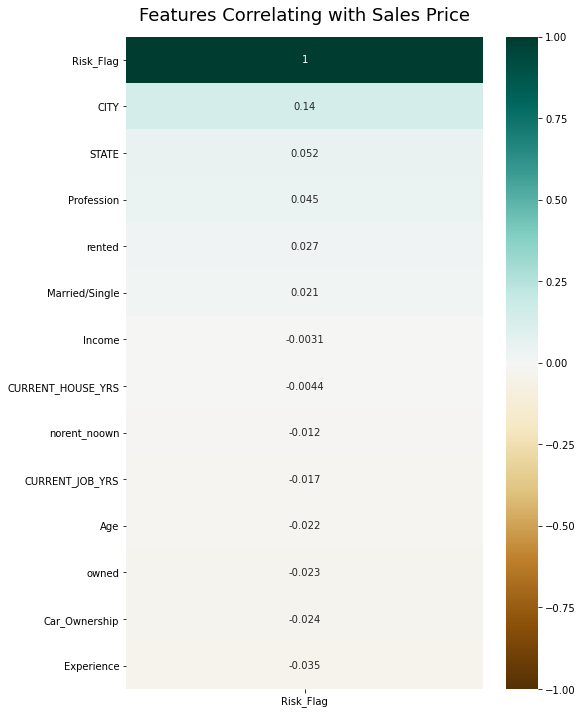

In [203]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Risk_Flag']].sort_values(by='Risk_Flag', ascending=False), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Sales Price', fontdict={'fontsize':18}, pad=16);

In [204]:
from sklearn.ensemble import RandomForestClassifier

y = X.pop('Risk_Flag')

model = RandomForestClassifier()
model.fit(X, y)

RandomForestClassifier()

<AxesSubplot:>

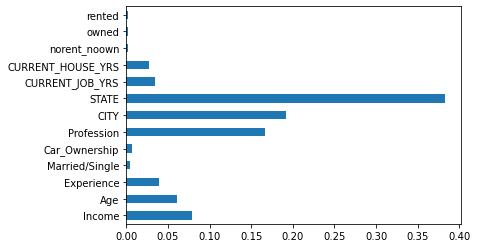

In [207]:
(pd.Series(model.feature_importances_, index=X.columns)
   .plot(kind='barh'))   